# Simulação do movimento Browniano 3D

* PER - Física
* Petiano: José Arthur de Luna Oliveira
* Data: 07/12/2022

O objetivo desse `Notebook` é simular o movimento Browniano, mesmo que esse tema já tenha sido abordado em um `Notebook` antigo [Movimento Browniano](https://github.com/gustavoavb/PET.py/blob/master/MovimentoBrowniano.ipynb) [1], feito por um ex-petiano. Neste `Notebook` fazer um Simulação do Movimento Browniano com várias partículas, 3D e com partículas diatômicas.

Este `Notebook` está dividido em 4 seções:
* Introdução teórica;
* Simulação do Movimento Browniano com uma partícula em 2D;
* Simulação do Movimento Browniano com várias partículas em 2D;
* Simulação Movimento Browniano em 3D.

## Importando Bibliotecas 

In [1]:
from vpython import*
import random as ran
import numpy as np

<IPython.core.display.Javascript object>

### Detalhes da Bibliotecas:

In [2]:
%load_ext version_information
%version_information Vpython, Numpy

Software versions
Python 3.9.13 64bit [MSC v.1916 64 bit (AMD64)]
IPython 7.31.1
OS Windows 10 10.0.19045 SP0
Vpython 7.6.4
Numpy 1.21.5
Sat Dec 03 18:53:53 2022 Hora Padrão de Buenos Aires

**OBS**: não é necessário checar a versão da biblioteca random, pois ela é uma biblioteca nativa do Python, ou seja, a versão dela acompanha a versão do Python.

## 1. Introdução Teórica

O movimento Browniano é o movimento aleatório das partículas de um fluido, no qual é resultante da colisão entres os átomos do fluido, tal fenômeno foi descoberto pelo médico botânico Robert Brown no século XIX. Com o passar dos anos foram levantadas muitas hipóteses a fim de explicar a causa desse fenômeno, porém apenas no século XX tal movimento foi explicado por Einstein.

### 1.1 Calculo do Movimento

Como o Movimento Browniano é aleatório, então para simplificar minha simulação usei a função `random`, na qual sorteia um valor entre $0$ e $1$ e multiplicando por $2\pi$ podemos obter um valor $\theta$ aleatório, assim podemos calcular o $sin(\theta)$ e $cos(\theta)$. Conseguinte, conseguimos o próximo movimento da partícula

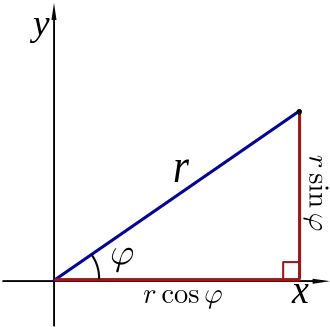

$r(x,y) = (x_{t-1} + cos\theta)\hat i + (y_{t-1} + sin\theta)\hat j$


$\theta = 2\pi n$, em que $n$ é a variável aleatória obtida pela função `random`.

## 2. Simulação do Movimento Browniano com uma partícula em 2D

### 2.1 Definindo a Grade

Para começarmos a pensar na simulação, primeiro vamos definir uma função para gerar uma grade 2D, esta função servirá tanto para esta seção quanto apra próxima.

In [3]:
def grid_2D(tmax, dt):
    for t in range(-tmax, tmax+dt, dt):
        curve(pos = [vector(t,tmax,0), vector(t,-tmax,0)])
        curve(pos = [vector(tmax,t,0), vector(-tmax,t,0)])
    return

### 2.2 Posição da Partícula

Primeiro vamos definir os limites da grade como $g$, e depois para escolher a posição inicial da partícula usarei o comando `randrange`, na qual sorteará um valor inteiro entre os limites da grade tanto no eixo $x$ quanto no eixo $y$. Assim definirei uma função para retornar os valores sorteados em $x_i$ e para $y_i$.

In [4]:
def fpos_i_2D():
    # a variável g é o limite da grade
    global g
    xi = ran.randrange(-g,g) 
    yi = ran.randrange(-g,g)
    return xi, yi

Vou agora definir uma função para gerar a partícula de raio $0.5$ em sua posíção inicial obtida em `fpos_i_2D`, para isso usarei o comando `sphere` no qual irá plotar uma esfera que representará a partícula. Conseguinte, temos que criar uma função vai receber $x_i$ e $y_i$ e plotará da partícula na grade, além de retorna a variável $par$, pois com ela poderemos ter acesso direto as informações da esfera, como posição, cor, entre outros.

In [5]:
def fpar_2D(xi, yi):
    global g
    canvas(title = 'Simulação do Movimento Browniano com uma partícula', width = 500, height = 500,background = color.white)
    grid_2D(g,1)
    par = sphere(pos = vector(xi, yi, 0), radius=0.5, color = color.green)
        
    return par

Agora iremos definir uma função que mudará a posição da partícula aleatóriamente em um tempo $t$, onde equela não pode passar dos limites da grade. Assim, caso ela for ultrapassar os limites da grade faremos $x(t) = x_{t-1} - cos(\theta)$ e analogamente faremo com o mesmo com $y(t)$. Assim para que essa função mude a posição da partícula na animação, ela terá que receber as posição inicial da partícula e a variável $par$. Com isso para mudar a posição da partícula usarei o comando $par.pos$, pois com esse comando teremos acesso a posição da esgfera e poderemos mudar sua posição.

In [6]:
def fpos_2D(x, y, par):
    global t, g
    for i in range(t):
        rate(10)
        theta = random()*2*pi
        
        if (x + cos(theta) > -g and x + cos(theta) < g):
            x += cos(theta)
        else:
            x -= cos(theta)
        if (y + sin(theta) > -g and y + sin(theta) < g):
            y += sin(theta)
        else:
            y -= sin(theta)
        
        par.pos = vector(x, y , 0)
        
    return

### 2.3 Plotagem

Para plotagem bastamos chamar a funções nesta ordem `fpos_i_2D`, `fpar_2D` e `fpos_2D`, usarei uma grade $20x20$.

In [7]:
g = 10
t = 10
xi, yi = fpos_i_2D()
par = fpar_2D(xi, yi)
fpos_2D(xi, yi, par)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 3. Simulação do Movimento Browniano com várias partículas em 2D

## 3.1 Posições das partículas

Para simular o Movimento Browniano com $n$ partículas, encontramos o problema que elas não podem coexistir na mesma posição. Então para definir a função da posição inicial, ela terá os mesmos princípios da função `fpos_i_2D` da seção anterior, porém ela terá que retornar as listas $x[n]$ e $y[n]$ com as posições iniciais de todas as partículas, onde os índices das listas correspondem a uma partícula, ou seja, o $x[0]$ e $y[0]$ correspendem a posição da partícula $0$. Além disso, para gerar uma posição de uma partícula a função deverá verificar se a posição dessa é igual a alguma das anteriores, se sim, a função deve gerer outra posição, até que todas as partículas sejam plotadas com uma posição inicial diferente.

In [8]:
def fpos_i_2D():
    global n, g
    x, y = [], [] # criando as listas das posições
    
    for i in range(n):
        cont = 0
        tempx = ran.randrange(-g,g) #sorteando posição xi
        tempy = ran.randrange(-g,g) #sorteando posição yi

        if i==0: #faço isso porque se i=0, então eu estou gerando a posição inicial da primeira partícula, 
                 #logo não  há possibilidade de coexistir com  outra, apenas apartir da segudna que terei esse problema
            x.append(tempx)
            y.append(tempy)

        else:
            for q in range(i): #verificando da posição das partículas
                if tempx == x[q] and tempy == y[q]:
                    cont += 1
                    ind = q

            if cont == 1:
                while tempx == x[ind] and  tempy == y[ind]: #sorteando uma nova posição
                    tempx = ran.randrange(-g,g)
                    tempy = ran.randrange(-g,g)
                x.append(tempx)
                y.append(tempy)

            else:
                x.append(tempx)
                y.append(tempy)
    return x, y

Agora vamos fazer uma função para plotar as partículas em sua posição inicial, esta também possui o mesmo principio da função `fpar_2D`da seção anterior, porém em vez de $par$ ser uma variável nesta função ele será uma lista com $n$ elementos, e cada elemento terá a informação de uma partícula.

In [9]:
def fpar_2D(x, y):
    global n, g
    canvas(title = 'Simulação do Movimento Browniano com várias partículas', width = 500, height = 500,background = color.white)
    grid_2D(g,1)
    par = []
    for i in range(n):
        par.append(sphere(pos = vector(x[i], y[i], 0), radius=0.5, color = color.green))
        
    return par

Agora vou definir uma função para variar a posição das partículas, porém teremos que resolver o problema delas não poderem coexitir no mesmo lugar, para isso verificarei sua nova posição de uma partícula com as novas posições geradas da partículas anteriores, assim caso essa distância entre ela seja menor um (usei esse fator porque o raio de cada partícula é $0.5$, assim duas partículas começam a se encostar quando a distância entre elas é menor do que $1$), chamarei a  função `corretor_2D` que irá gerar uma nova posição para essa partícula.

In [10]:
def fpos_2D(x, y, par):
    global n, t, g
    
    for J in range(t):
        rate(10)
        for i in range(n):
            theta = ran.random()*2*pi
            r = [x[i], y[i]]
            
            # encontrando a nova posição em x 
            if (r[0] + cos(theta) > -g and r[0] + cos(theta) < g):
                r[0] += cos(theta)
            else:
                r[0] -= cos(theta)
                
            # encontrando a nova posição em y
            if (r[1] + sin(theta) > -g and r[1] + sin(theta) < g):
                r[1] += sin(theta)
            else:
                r[1] -= sin(theta)
            
            #verificando a posição das partículas
            if i!=0:
                for q in range(i):
                    while abs(r[0]-x[q])<1 and abs(r[1]-y[q])<1:
                        r = corretor_2D(x[i], y[i])
            x[i] = r[0]
            y[i] =  r[1]
            par[i].pos = vector(r[0], r[1] , 0)
    return

Definindo a função `corretor_2D`, em que apenas irá sortear uma nova posição para a partícula.

In [11]:
def corretor_2D(x, y):
    theta = ran.random()*2*pi
    r = [x, y]
    
    if (r[0] + cos(theta) > -g and r[0] + cos(theta) < g):
        r[0] += cos(theta)
    else:
        r[0] -= cos(theta)

    if (r[1] + sin(theta) > -g and r[1] + sin(theta) < g):
        r[1] += sin(theta)
    else:
        r[1] -= sin(theta)
        
    return r

### 3.2 Plotagem

Para potagem basta chaamr a função na mesma ordem que a da seção anterior, nessa plotagem usarei uma grade $20x20$ e $30$ partículas.

In [12]:
g, n = 10, 30
t = 10
pos_x, pos_y = fpos_i_2D()
par = fpar_2D(pos_x, pos_y)
fpos_2D(pos_x, pos_y, par)

<IPython.core.display.Javascript object>

## 4. Simulação Movimento Browniano em 3D

### 4.1 Definindo a Grade

Para fazer a Simulação em 3D temos que definir uma função para gerar uma grade em 3D - `grid_3D`, esta função servirá tanto para está seção quanto para as próximas.

In [3]:
def grid_3D(tmax, dt):
    for t in range(-tmax, tmax+dt, dt):
        
        curve(pos = [vector(t,tmax,-tmax), vector(t,-tmax,-tmax)])
        curve(pos = [vector(t,-tmax,tmax), vector(t,-tmax,-tmax)])
        curve(pos = [vector(t,tmax,tmax), vector(t,tmax,-tmax)])
        
        curve(pos = [vector(tmax,t,-tmax), vector(-tmax,t,-tmax)])
        curve(pos = [vector(-tmax,t,tmax), vector(-tmax,t,-tmax)])
        
        curve(pos = [vector(tmax,-tmax,t), vector(-tmax,-tmax,t)])
        curve(pos = [vector(-tmax,tmax,t), vector(-tmax,-tmax,t)])
        curve(pos = [vector(tmax,tmax,t), vector(-tmax,tmax,t)])
        
    return

### 4.2 Adaptando as Funções das Posições de 2D para 3D

Primeiramente vamos adaptar a função da posição inicial para três dimesões, para isso bastamos fazer o mesmo processo porém vamos sotear um valor para $zi$ e armazenar numa lista $z[n]$, assim teremos

In [4]:
def pos_i_3D():
    global n, g
    x, y, z = [], [], []
    
    for i in range(n):
        count = 0
        #sorteando posições
        tempx = ran.randrange(-g,g)
        tempy = ran.randrange(-g,g)
        tempz = ran.randrange(-g,g)
        
        if i==0:
            x.append(tempx)
            y.append(tempy)
            z.append(tempz)
        else:
            #verificando se a posição das partículas é igual alguma outra
            for q in range(i):
                if tempx == x[q] and tempy == y[q] and tempz == z[q]:
                    count += 1
                    ind = q

            if count == 1:
                #sorteando uma nova posição para a partícula
                while tempx == x[ind] and  tempy == y[ind] and tempz == z[ind]:
                    tempx = ran.randrange(-g,g)
                    tempy = ran.randrange(-g,g)
                    tempz = ran.randrange(-g,g)
                x.append(tempx)
                y.append(tempy)
                z.append(tempz)

            else:
                x.append(tempx)
                y.append(tempy)
                z.append(tempz)
    return x, y, z

Para adptar a função `fpar_2D` para `fpar_3D`, basta agora adicionar o eixo $z$ que antes não tinha.

In [15]:
def fpar_3D(x, y, z):
    global n, g
    canvas(title = 'Movimento Browniano', width = 500, height = 500,background = color.white)
    grid_3D(g,1)
    par = []
    for i in range(n):
        par.append(sphere(pos = vector(x[i], y[i], z[i]),radius=0.5, color = color.green))
        
    return par

Para agora adptar a função `fpos_2D` para `fpos_3D` há um problema, pois não podemos usar o mesmo ângulo aleatório para a variável $z$ porque o tal variável é perpendicular ao plano $xy$, assim temos que usar um novo ângulo aletatório $\varphi$ para a variável $z$.

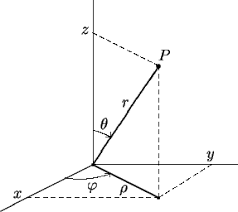

$OBS$ : na imagem acima o $\theta$ e o $\phi$ estão trocados.

Com essa imagem podemos ver que $cos(\varphi) = z/r$, onde $r = 1$, logo $$z=cos(\varphi)$$

Assim, $$r(x,y,z) = (x_{t-1} + cos\theta)\hat i + (y_{t-1} + sin\theta)\hat j + (z_{t-1} + cos(\varphi))\hat k$$

Onde $\varphi = 2\pi n$, em que $n$ é um número alatório entre $0$ e $1$.

Agora com esses resultados, sabemos como aplicar o $\varphi$ para a variável $z$ na função `fpos_3D`.

In [16]:
def fpos_3D(x, y, z, par):
    global n, t, g
    
    for J in range(t):
        rate(10)
        for i in range(n):
            theta = ran.random()*2*pi
            phi = ran.random()*2*pi
            r = [x[i], y[i], z[i]]
            
            # encontrando a nova posição em x
            if (r[0] + cos(theta) > -g and r[0] + cos(theta) < g):
                r[0] += cos(theta)
            else:
                r[0] -= cos(theta)
                
            # encontrando a nova posição em y
            if (r[1] + sin(theta) > -g and r[1] + sin(theta) < g):
                r[1] += sin(theta)
            else:
                r[1] -= sin(theta)
               
            #encontrando a nova posição de z
            if (r[2] + cos(phi) > -g and r[2] + cos(phi) < g):
                r[2] += cos(phi)
            else:
                r[2] -= cos(phi)
            
            #verificando a posição das partículas
            if i!=0:
                for q in range(i):
                    while (abs(r[0]-x[q])<1 and abs(r[1]-y[q])<1 and abs(r[2]-z[q])<1):
                        r = corretor_3D(x[i], y[i], z[i])
            
            x[i], y[i], z[i]= r[0], r[1], r[2]
            par[i].pos = vector(r[0], r[1], r[2])
    return

Agora vamos adptar a função `corretor_2D` para `corretor_3D`.

In [17]:
def corretor_3D(x, y, z):
    theta = ran.random()*2*pi
    phi = ran.random()*2*pi
    r = [x, y, z]
    
    if (r[0] + cos(theta) > -g and r[0] + cos(theta) < g):
        r[0] += cos(theta)
    else:
        r[0] -= cos(theta)

    if (r[1] + sin(theta) > -g and r[1] + sin(theta) < g):
        r[1] += sin(theta)
    else:
        r[1] -= sin(theta)
        
    if (r[2] + cos(phi) > -g and r[2] + cos(phi) < g):
        r[2] += cos(phi)
    else:
        r[2] -= cos(phi)
    
    return r

### 4.3 Plotagem

Para plotar a animação basta chamar as funções `pos_i_3D`, `fpar_3D` e `fpos_3D`, respectivamente. Usarei uma grade $12x12x12$ e $40$ partículas.

In [18]:
g, n = 6, 40
t = 10
pos_x, pos_y, pos_z = pos_i_3D()
par = fpar_3D(pos_x, pos_y, pos_z)
fpos_3D(pos_x, pos_y, pos_z, par)

<IPython.core.display.Javascript object>

## 5. Simulação do Movimento Browniano com uma Molécula diatômica 3D

### 4.1 Posição das Partículas

Primeiramente vamos adaptar a função das partículas, pois agora devemos plotar duas partículas. Para essa função decidi que a segunda molécula iria ficar inicialmente a $0.5$ de distância em cada eixo.

In [5]:
def fpar_3D_Dia(x, y, z):
    global n, g
    canvas(title = 'Movimento Browniano', width = 500, height = 500,background = color.white)
    grid_3D(g,1)
    par = []
    par2 = []
    for i in range(n):
        par.append(sphere(pos = vector(x[i], y[i], z[i]),radius=0.5, color = color.green))
        par2.append(sphere(pos = vector(x[i]+0.5, y[i]+0.5, z[i]+0.5),radius=0.5, color = color.blue))
    return par, par2

Agora vamos definir a função que vai mudar a posição das partículas, aqui devemos ter mais cuidado pois com agora as partículas são diatômicas devemos ter cuidado com elas ocupando a mesma posição. Adaptando da função `fpos_3D` irei adcionar criar novos 3 arrays, que irãa armazenar as posições das segundas partículas

In [18]:
def fpos_3D_Dia(x, y, z, par, par2):
    global n, N, g
    x2, y2, z2 = np.zeros(n), np.zeros(n), np.zeros(n)
    
    for j in range(N):
        rate(10)
        for i in range(n):
            theta = ran.random()*2*pi
            phi = ran.random()*2*pi
            r = [x[i], y[i], z[i]]
            
            # encontrando a nova posição em x
            if (r[0] + cos(theta) > -g and r[0] + cos(theta) < g):
                r[0] += cos(theta)
            else:
                r[0] -= cos(theta)
                
            # encontrando a nova posição em y
            if (r[1] + sin(theta) > -g and r[1] + sin(theta) < g):
                r[1] += sin(theta)
            else:
                r[1] -= sin(theta)
                
            if (r[2] + cos(phi) > -g and r[2] + cos(phi) < g):
                r[2] += cos(phi)
            else:
                r[2] -= cos(phi)
                
            if i!=0:
                for q in range(i):
                    while abs(r[0]-x[q])<1 and abs(r[1]-y[q])<1 and abs(r[2]-z[q])<1:
                        r = corretor_3D_Dia(x[i],y[i],z[i])
            
            x[i], y[i], z[i]= r[0], r[1], r[2]
            par[i].pos = vector(r[0] ,r[1] , r[2])
            
            omega = 2*pi*ran.random()
            phi2 = 2*pi*ran.random()
            r2 = [x[i], y[i], z[i]]
            
            if (r2[0] + cos(omega) > -g and r2[0] + cos(omega) < g):
                r2[0] += cos(omega)
            else:
                r[0] -= cos(omega)
                
            # encontrando a nova posição em y
            if (r2[1] + sin(omega) > -g and r2[1] + sin(omega) < g):
                r2[1] += sin(omega)
            else:
                r2[1] -= sin(omega)
                
            #encontrando a nova posição em z
            if (r2[2] + cos(phi2) > -g and r2[2] + cos(phi2) < g):
                r2[2] += cos(phi2)
            else:
                r2[2] -= cos(phi2)
                
            if i!=0:
                for q in range(i):
                    while abs(r2[0]-x2[q])<1 and abs(r2[1]-y2[q])<1 and abs(r2[2]-z2[q])<1:
                        r2 = corretor_3D_Dia(x[i],y[i],z[i])
            
            x2[i], y2[i], z2[i] = r2[0], r2[1], r2[2]
            par2[i].pos = vector(r2[0], r2[1],  r2[2])
    return

In [19]:
def corretor_3D_Dia(x,y,z):
    
    theta = ran.random()*2*pi
    phi = ran.random()*2*pi
    
    r = [x, y, z]
    
    if (r[0] + cos(theta) > -g and r[0] + cos(theta) < g):
        r[0] += cos(theta)
    else:
        r[0] -= cos(theta)
                
    # encontrando a nova posição em y
    if (r[1] + sin(theta) > -g and r[1] + sin(theta) < g):
        r[1] += sin(theta)
    else:
        r[1] -= sin(theta)
                
    if (r[2] + cos(phi) > -g and r[2] + cos(phi) < g):
        r[2] += cos(phi)
    else:
        r[2] -= cos(phi)
    
    return r

In [20]:
def corretor_3D_Dia2(x,y,z):
    omega = 2*pi*ran.random()
    r2 = [x,y,z]
    if (r2[0] + cos(omega) > -g and r2[0] + cos(omega) < g):
        r2[0] += cos(omega)
    else:
        r2[0] -= cos(omega)
                
    # encontrando a nova posição em y
    if (r2[1] + sin(omega) > -g and r2[1] + sin(omega) < g):
        r2[1] += sin(omega)
    else:
        r2[1] -= sin(omega)
    
    return r2

In [21]:
g, n, N = 10, 40, 100
x, y, z = pos_i_3D()
par, par2 = fpar_3D_Dia(x, y, z)
fpos_3D_Dia(x, y, z, par, par2)

<IPython.core.display.Javascript object>